### Supplementary Figure 
#### Generating matrices with arbitrary dimension and clustering

In [292]:
import numpy as np
import matplotlib
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
plt.rcParams["axes.grid"] = False
matplotlib.rcParams['axes.linewidth'] = .75

In [293]:
# Choose integers n and k such that n < k.
n = 2
k = 5
m = 1000 # nu# mber of features
r = 200 #samples per cluster
N = k * r #samples in selectivity space

In [294]:
# Generate m random samples X from and n-dimensional normal distribution.
mean = np.random.rand(n)
cov = np.eye(n)
X = np.random.multivariate_normal(mean, cov, m)

In [295]:
# Embed these samples in a k-dimensional space using an orthonormal matrix, Q,  of shape (n x k)
from scipy.stats import ortho_group
Q = ortho_group.rvs(k)[:n,:]
Y = X @ Q

In [296]:
# Expand Y to a matrix Z of shape (m X N) by duplicating the columns of Z.
Z = np.tile(Y,(1,r))

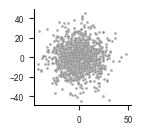

In [297]:
# Calculate dimension of rows of Z.
pca = PCA().fit(Z)
x_proj = pca.transform(Z)

fig = plt.figure(figsize=(1.25,1.25))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])
sns.scatterplot(x = x_proj[:,0],y = x_proj[:,1],ax=ax,s=4,alpha = .75,color='gray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('', fontsize=8)
ax.xaxis.set_tick_params(labelsize=6,bottom=True)
ax.yaxis.set_tick_params(labelsize=6,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

fig.savefig('/Users/cl1704/PycharmProjects/embedding_dimension/RNN/Figures/Figure_rdmmatrices_a.jpg',
    format='jpeg',
    dpi=450,
    bbox_inches='tight'
            )


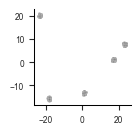

In [298]:
# Plot first two principal components of selectivity space.
noise = np.random.multivariate_normal(np.zeros(N), .1*np.eye(N), m)  
Z = Z + noise
x_proj = PCA(n_components = 2).fit_transform(Z.T)

fig = plt.figure(figsize=(1.25,1.25))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])

sns.scatterplot(x = x_proj[:,0], y = x_proj[:,1],s=4,alpha=.5,color='gray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('', fontsize=8)
ax.xaxis.set_tick_params(labelsize=6,bottom=True)
ax.yaxis.set_tick_params(labelsize=6,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

fig.savefig('/Users/cl1704/PycharmProjects/embedding_dimension/RNN/Figures/Figure_rdmmatrices_c.jpg',
    format='jpeg',
    dpi=450,
    bbox_inches='tight'
            )


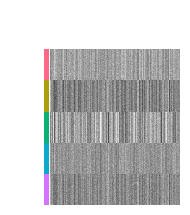

In [299]:
clustering = KMeans(n_clusters=k, n_init=20).fit(Z.T)
labels = clustering.labels_
sort = np.argsort(labels)
sorted_responses = (Z.T)[sort, :]
sns.husl_palette(s=.4)
network_pal = sns.husl_palette(pd.Series(np.sort(labels)).unique().size, s=1)
lut = dict(zip(pd.Series(np.sort(labels)).unique(), network_pal))
row_colors = pd.Series(np.sort(labels)).map(lut)
g = sns.clustermap(pd.DataFrame((sorted_responses)), row_cluster=False, col_cluster=False, row_colors=row_colors,
                   figsize=(2, 2.25), cbar_pos=None, xticklabels=False, yticklabels=False, center=0,cmap='Greys')


g.savefig('/Users/cl1704/PycharmProjects/embedding_dimension/RNN/Figures/Figure_rdmmatrices_e.jpg',
          format='jpeg',
          dpi=450,
          bbox_inches='tight'
          )